In [1]:
pip install librosa

In [2]:
pip install wave

  Preparing metadata (setup.py) ... done
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1220 sha256=234c95c30fb4d6404891736a58499a32ad085eaf3fe4dfe3c2311c5363499f3a
  Stored in directory: /root/.cache/pip/wheels/f8/24/4d/1b01c0e32da3eb3fd71bbbc6093fcc557ec3b2d9e532ecd65d
Successfully built wave


In [3]:
pip install keras

In [4]:
pip install tensorflow

In [5]:
pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0


In [6]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [7]:
import librosa
import wave
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Keras and TensorFlow imports
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

print("loaded libraries")

loaded libraries


In [8]:
def extract_mfcc(wav_file_name):
  y,sr=librosa.load(wav_file_name)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc

In [9]:
# Initialize empty lists for labels and data
rawdess_speech_labels = []
rawdess_speech_data = []

# Walk through the dataset directory
for dirname, _, filename in os.walk('/content/drive/MyDrive/Ravdness DataSet'):
    for filename in filename:
        # Extract label from filename (7th character, subtract 1)
        rawdess_speech_labels.append(int(filename[7:8]) - 1)

        # Get full path to audio file
        wav_file_name = os.path.join(dirname,filename)

        # Extract audio features and append to data list
        rawdess_speech_data.append(extract_mfcc(wav_file_name))

print("Finish Loading the Dataset")

Finish Loading the Dataset


In [13]:
# Convert lists to numpy arrays
rawdess_speech_data_array = np.asarray(rawdess_speech_data)
rawdess_speech_label_array = np.asarray(rawdess_speech_labels)

# Print shape of label array
print("Shape of speech data array:", rawdess_speech_data_array.shape)
print("Shape of speech label array:", rawdess_speech_label_array.shape)

# Convert labels to categorical format (one-hot encoding)
labels_categorical = to_categorical(rawdess_speech_label_array)
print("Shape of categorical labels:", labels_categorical.shape)

Shape of speech data array: (2897, 40)
Shape of speech label array: (2897,)
Shape of categorical labels: (2897, 8)


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    np.array(rawdess_speech_data_array),
    labels_categorical,
    test_size=0.5,
    random_state=9
)

In [15]:
# Calculate sizes for training, validation, and testing sets
number_of_samples = rawdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.optimizers import Adam

def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Reshape input data for LSTM
w = np.expand_dims(rawdess_speech_data_array[:training_samples], -1)
print("Training data shape:", w.shape)  # Should print (1152, 40, 1)

# Create and train the model
model_A = create_model_LSTM()
history = model_A.fit(
    np.expand_dims(rawdess_speech_data_array[:training_samples], -1),
    labels_categorical[:training_samples],
    validation_data=(
        np.expand_dims(rawdess_speech_data_array[training_samples:training_samples+validation_samples], -1),
        labels_categorical[training_samples:training_samples+validation_samples]
    ),
    epochs=80,
    shuffle=True
)

Training data shape: (2317, 40, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.1238 - loss: 2.0795 - val_accuracy: 0.1142 - val_loss: 2.0462
Epoch 2/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.1910 - loss: 2.0377 - val_accuracy: 0.1972 - val_loss: 2.0008
Epoch 3/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.2076 - loss: 1.9969 - val_accuracy: 0.2803 - val_loss: 1.9562
Epoch 4/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.2268 - loss: 1.9701 - val_accuracy: 0.2491 - val_loss: 1.9538
Epoch 5/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.2575 - loss: 1.9089 - val_accuracy: 0.2699 - val_loss: 1.8857
Epoch 6/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.2565 - loss: 1.8675 - val_accuracy: 0.2941 - val_loss: 1.8546
Epoch 7/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2866 - loss: 1.8483 - val_accuracy: 0.2872 - val_loss: 1.8629
Epoch 8/80
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.2800 - loss: 1.8600 - val_accuracy: 0.2803 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8231 - loss: 0.4665
Test loss: 0.5606, Test accuracy: 0.7698
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

Model Performance Metrics:
Accuracy: 85.1622
Precision: 86.4308
Recall: 0.8516
F1-Score: 0.8469


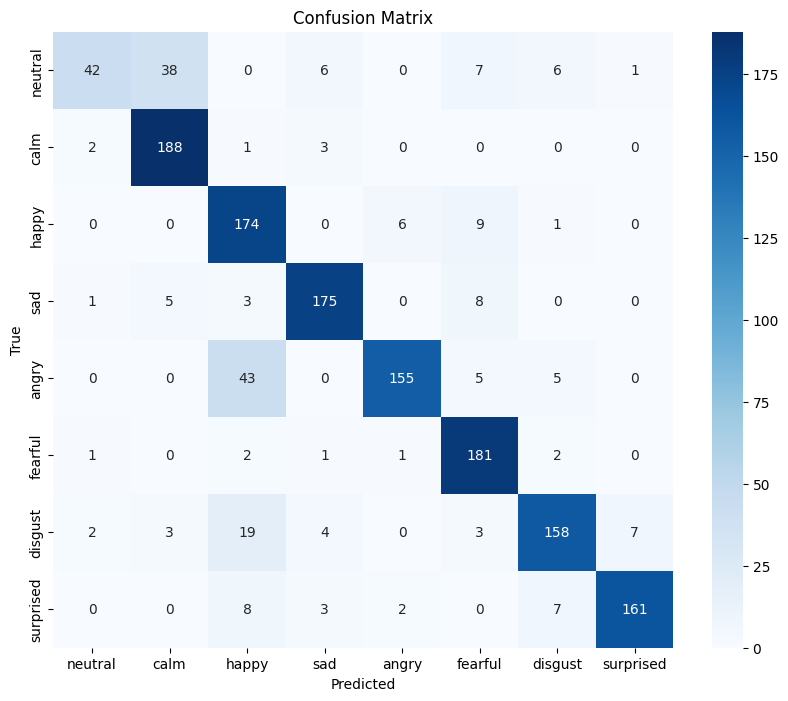

In [23]:
# Evaluate the model
evaluation = model_A.evaluate(
    np.expand_dims(rawdess_speech_data_array[training_samples + validation_samples:], -1),
    labels_categorical[training_samples + validation_samples:]
)
print(f"Test loss: {evaluation[0]:.4f}, Test accuracy: {evaluation[1]:.4f}")

# Define emotions dictionary
emotions = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
           5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}

def predict(wav_filepath):
    # Play the audio
    display(Audio(wav_filepath, autoplay=True))

    # Make prediction
    test_point = extract_mfcc(wav_filepath)  # Assuming extract_mfcc function is defined elsewhere
    test_point = np.reshape(test_point, newshape=(1, 40, 1))
    predictions = model_A.predict(test_point)  # Assuming model_A is defined elsewhere
    print(emotions[np.argmax(predictions[0]) + 1])

# Import required metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns

# Make predictions on test set
y_pred = model_A.predict(np.expand_dims(X_test, -1))  # Assuming X_test is your test data

# Convert predictions and true labels to integer format
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Calculate metrics
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
accuracy = accuracy_score(y_test_int, y_pred_int)
precision = precision_score(y_test_int, y_pred_int, average='weighted')
recall = recall_score(y_test_int, y_pred_int, average='weighted')
f1 = f1_score(y_test_int, y_pred_int, average='weighted')

# Print metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy*100:.4f}")
print(f"Precision: {precision*100:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Optional: Plot confusion matrix with emotion labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(emotions.values()),
            yticklabels=list(emotions.values()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()